In [78]:
import pandas as pd
import numpy as np  

dataset = pd.read_csv('HeartDisease.csv')
print(dataset.shape)

dataset['education'] = dataset['education'].fillna(1)
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(1)
dataset['BPMeds'] = dataset['BPMeds'].fillna(0)

columns_to_fill = ['totChol', 'BMI', 'glucose', "heartRate"]
means = dataset[columns_to_fill].mean()
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(means)

from sklearn.model_selection import train_test_split
trainSet, tempSet = train_test_split(dataset, test_size=0.30, random_state=42)
valSet, testSet = train_test_split(tempSet, test_size=0.50, random_state=42)

print(trainSet.shape)
print(valSet.shape)
print(testSet.shape)




(4238, 16)
(2966, 16)
(636, 16)
(636, 16)


Cost after iteration 0: 2.606696128203236
Cost after iteration 100: 2.606697955065285
Cost after iteration 200: 4.278325376892809
Cost after iteration 300: 2.6067000966913727
Cost after iteration 400: 2.606700096521666
Cost after iteration 500: 2.516796363461363
Cost after iteration 600: 2.6876363371387724
Cost after iteration 700: 4.249546270657989
Cost after iteration 800: 0.7741120166275623
Cost after iteration 900: 1.8976909666676602


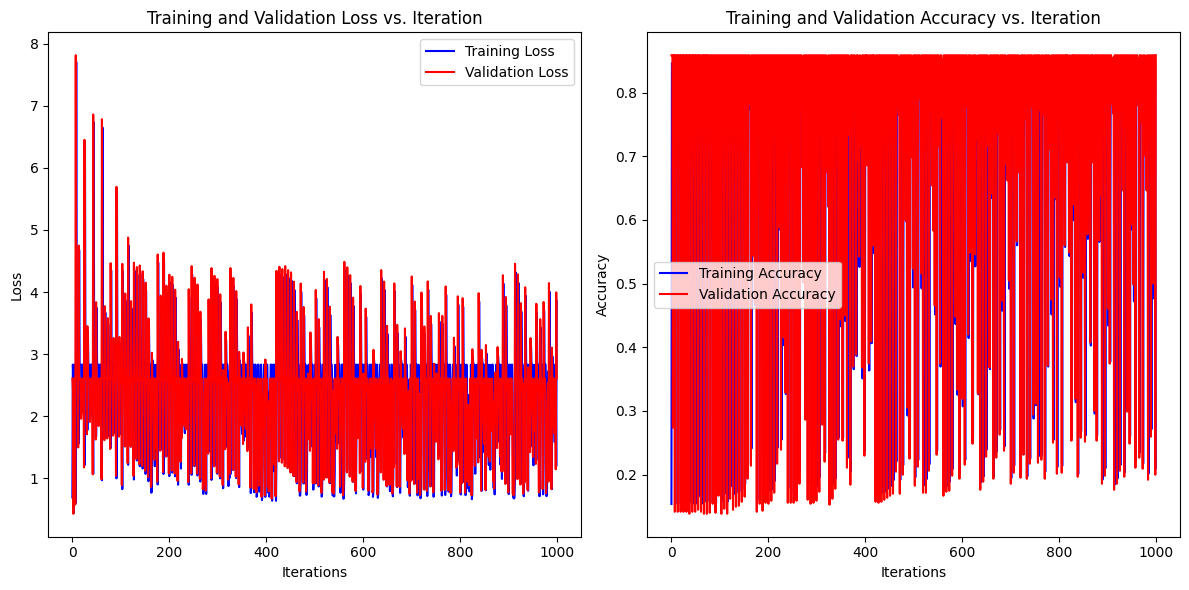

In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def crossEntropyLoss(y_true, y_pred):
    m = len(y_true)
    return -(1/m) * np.sum(y_true * np.log(y_pred+1e-8) + (1 - y_true) * np.log(1 - y_pred+1e-8))


def LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    
    train_cost_history = []
    train_accuracy_history = []
    val_cost_history = []
    val_accuracy_history = []
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    for i in range(iterations):
        z = np.dot(X_train, weights) + bias
        y_pred = sigmoid(z)

        dz = y_pred - y_train
        dw = (1/m) * np.dot(X_train.T, dz)
        db = (1/m) * np.sum(dz)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        loss = crossEntropyLoss(y_train, y_pred)
        train_cost_history.append(loss)

        val_y_pred = sigmoid(np.dot(X_val, weights) + bias)

        loss = crossEntropyLoss(y_val, val_y_pred)
        val_cost_history.append(loss)

        accuracy = np.mean((y_pred >= 0.5) == y_train)
        train_accuracy_history.append(accuracy)

        accuracy = np.mean((val_y_pred >= 0.5) == y_val)
        val_accuracy_history.append(accuracy)

        if i % 100 == 0:
            print(f'Cost after iteration {i}: {loss}')

    return weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred


X_train = trainSet.iloc[:, :-1].values
y_train = trainSet.iloc[:, -1].values
X_val = valSet.iloc[:, :-1].values
y_val = valSet.iloc[:, -1].values
iterations = 1000
learning_rate = 0.001

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history, val_y_pred = LogisticRegressionBatchGD(X_train, y_train,X_val, y_val, learning_rate, iterations)

import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

Cost after iteration 0: 0.692882522496012
Cost after iteration 100: 0.6678999122513684
Cost after iteration 200: 0.6456257949376247
Cost after iteration 300: 0.6257498006331941
Cost after iteration 400: 0.6079938402793417
Cost after iteration 500: 0.5921104758567568
Cost after iteration 600: 0.5778806958799243
Cost after iteration 700: 0.565111395804411
Cost after iteration 800: 0.553632774601034
Cost after iteration 900: 0.5432957877915745


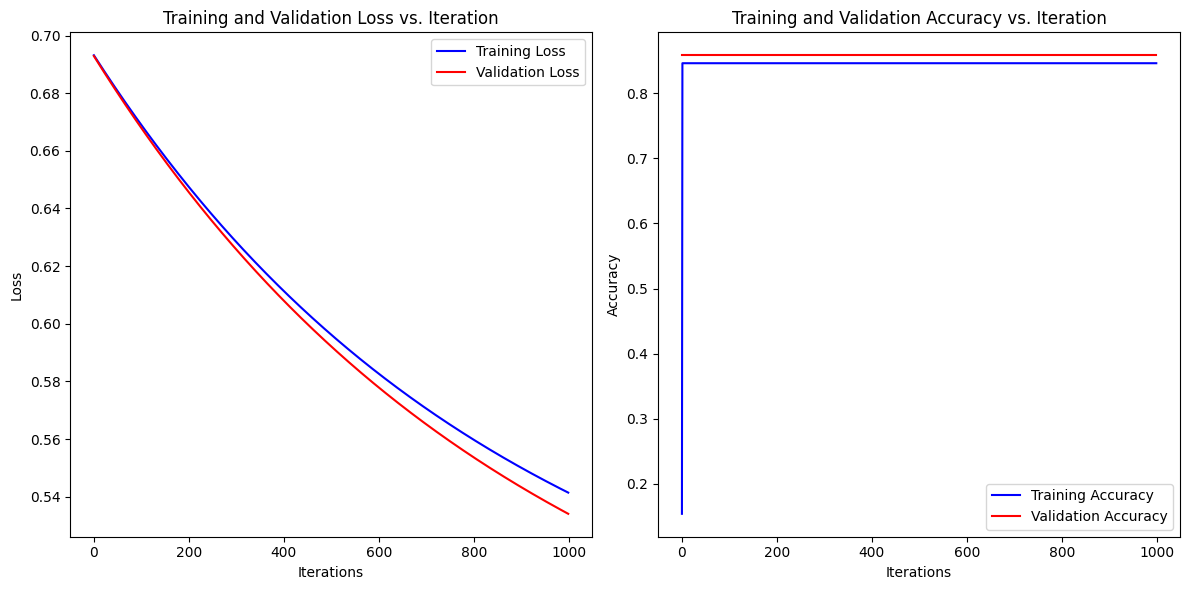

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

weights, bias, train_cost_history, train_accuracy_history, val_cost_history, val_accuracy_history,val_y_pred = LogisticRegressionBatchGD(X_train_scaled, y_train,X_val_scaled, y_val, learning_rate, iterations)

plt.figure(figsize=(12, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_cost_history, label='Training Loss', color='blue')
plt.plot(val_cost_history, label='Validation Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Iteration')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Assume y_true and y_pred are your true and predicted labels
print(y_val)
print(val_y_pred)
val_y_pred_binary = (val_y_pred >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, val_y_pred_binary)
tn, fp, fn, tp = conf_matrix.ravel()

precision = precision_score(y_val, val_y_pred_binary)
recall = recall_score(y_val, val_y_pred_binary)
f1 = f1_score(y_val, val_y_pred_binary)
roc_auc = roc_auc_score(y_val, val_y_pred_binary)  # y_prob are the predicted probabilities

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")


[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training with Stochastic Gradient Descent:
SGD Iteration 0 - Training Loss: 0.6289794570127678, Validation Loss: 0.6266297552661044, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
SGD Iteration 100 - Training Loss: 0.42307725750452035, Validation Loss: 0.39882379275345947, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
SGD Iteration 200 - Training Loss: 0.41144383608641044, Validation Loss: 0.38737351068821657, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
SGD Iteration 300 - Training Loss: 0.40545587533145183, Validation Loss: 0.3811869581539982, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
SGD Iteration 400 - Training Loss: 0.4015928213702057, Validation Loss: 0.37740641116580753, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
SGD Iteration 500 - Training Loss: 0.3986392664004541, Validation Loss: 0.37503040317144914, Train

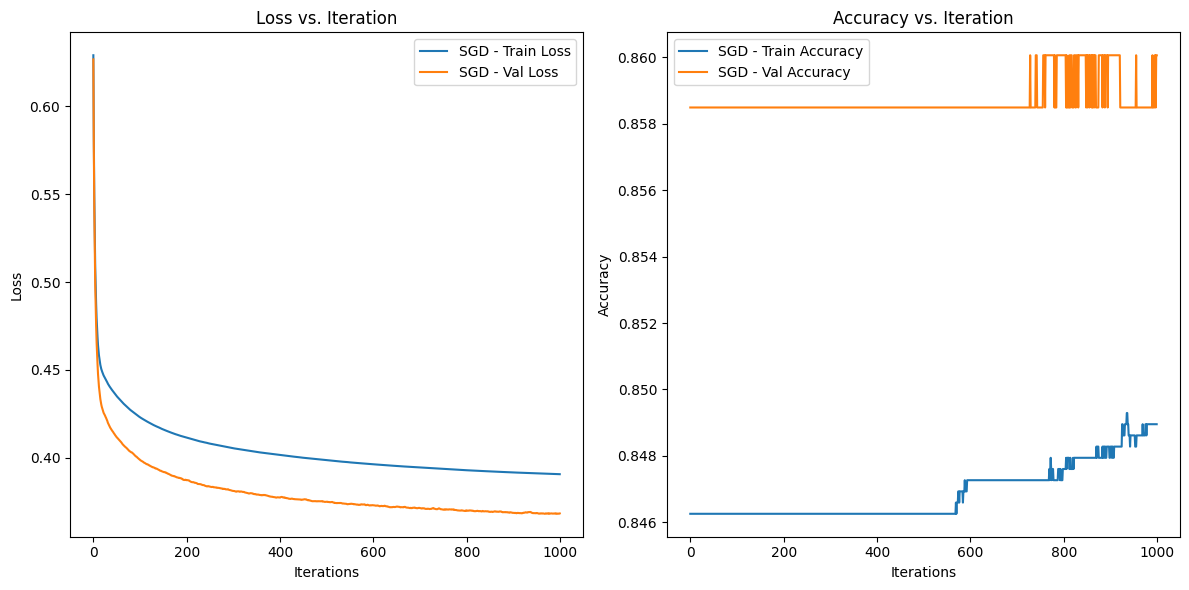

In [82]:
def accuracy(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def LogisticRegressionSGD(X_train, y_train, X_val, y_val, learning_rate, iterations):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    
    for i in range(iterations):
        for j in range(m):  # SGD updates after each sample
            random_idx = np.random.randint(0, m)
            X_i = X_train[random_idx, :].reshape(1, -1)
            y_i = y_train[random_idx]

            # Compute prediction
            z = np.dot(X_i, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_i
            dw = np.dot(X_i.T, dz)
            db = dz

            # Update weights and bias
            weights -= learning_rate * dw.flatten()
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'SGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

# Hyperparameters
learning_rate = 0.0001
iterations = 1000

# SGD
print("Training with Stochastic Gradient Descent:")
weights_sgd, bias_sgd, train_cost_sgd, val_cost_sgd, train_acc_sgd, val_acc_sgd = LogisticRegressionSGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations)

# Plot Training Loss for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_sgd, label='SGD - Train Loss')
plt.plot(val_cost_sgd, label='SGD - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_sgd, label='SGD - Train Accuracy')
plt.plot(val_acc_sgd, label='SGD - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Training with Mini-Batch Gradient Descent (batch size = 32):
MBGD Iteration 0 - Training Loss: 0.5472578868266937, Validation Loss: 0.5404070826245992, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 100 - Training Loss: 0.40479155641569375, Validation Loss: 0.3806400610815543, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 200 - Training Loss: 0.395734259133098, Validation Loss: 0.37232009517635417, Training Accuracy: 0.8472690492245448, Validation Accuracy: 0.8584905660377359
MBGD Iteration 300 - Training Loss: 0.39126037868411095, Validation Loss: 0.3683768182110267, Training Accuracy: 0.8482805124747134, Validation Accuracy: 0.8584905660377359
MBGD Iteration 400 - Training Loss: 0.38872723020492217, Validation Loss: 0.3662562469706157, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8616352201257862
MBGD Iteration 500 - Training Loss: 0.3871484760366784, Validation Loss: 0.36

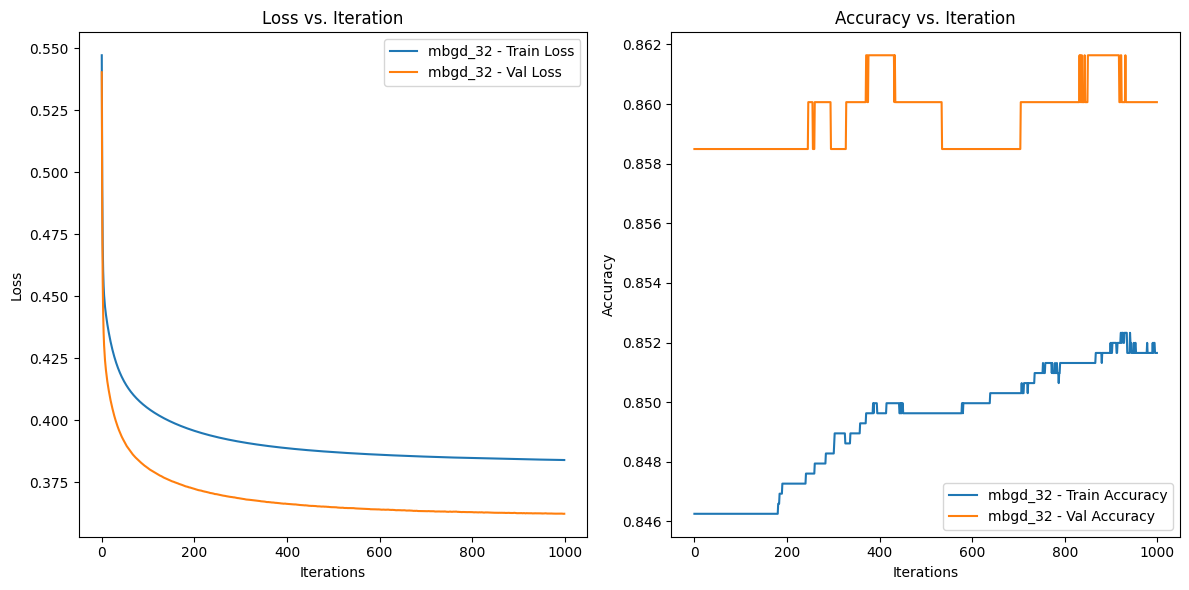


Training with Mini-Batch Gradient Descent (batch size = 64):
MBGD Iteration 0 - Training Loss: 0.6016059244320158, Validation Loss: 0.597952895730898, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 100 - Training Loss: 0.41524234604641896, Validation Loss: 0.39105784863486187, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 200 - Training Loss: 0.40486068634328776, Validation Loss: 0.3806789681135674, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 300 - Training Loss: 0.39940492878424866, Validation Loss: 0.3755894012376303, Training Accuracy: 0.8462575859743763, Validation Accuracy: 0.8584905660377359
MBGD Iteration 400 - Training Loss: 0.39576483466091433, Validation Loss: 0.372357935379482, Training Accuracy: 0.8472690492245448, Validation Accuracy: 0.8584905660377359
MBGD Iteration 500 - Training Loss: 0.3931766636168816, Validation Loss: 0.37

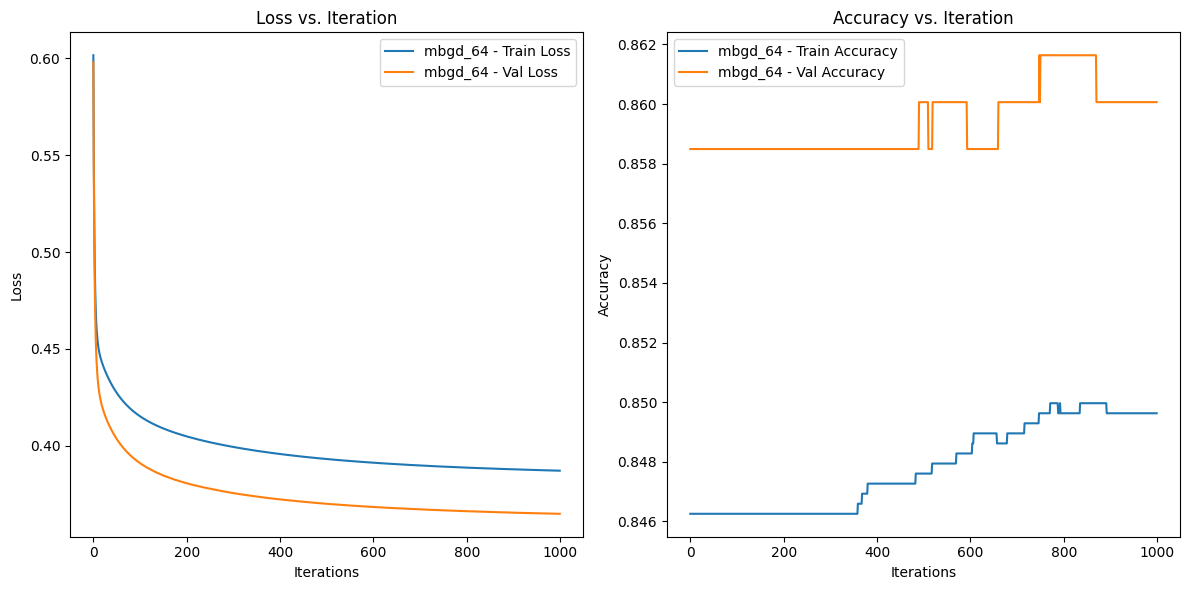

In [83]:
def LogisticRegressionMiniBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations, batch_size):
    m = len(y_train)
    weights = np.zeros(X_train.shape[1])
    bias = 0
    
    train_cost_history = []
    val_cost_history = []
    train_accuracy_history = []
    val_accuracy_history = []

    for i in range(iterations):
        # Shuffle the training data for each iteration
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, m, batch_size):  # Iterate through mini-batches
            X_batch = X_train_shuffled[j:j+batch_size]
            y_batch = y_train_shuffled[j:j+batch_size]

            # Compute prediction
            z = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(z)

            # Gradients
            dz = y_pred - y_batch
            dw = np.dot(X_batch.T, dz) / batch_size
            db = np.sum(dz) / batch_size

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute loss and accuracy for the entire training and validation sets
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = crossEntropyLoss(y_train, y_train_pred)
        val_loss = crossEntropyLoss(y_val, y_val_pred)
        train_cost_history.append(train_loss)
        val_cost_history.append(val_loss)

        train_accuracy = accuracy(y_train, y_train_pred)
        val_accuracy = accuracy(y_val, y_val_pred)
        train_accuracy_history.append(train_accuracy)
        val_accuracy_history.append(val_accuracy)

        if i % 100 == 0:
            print(f'MBGD Iteration {i} - Training Loss: {train_loss}, Validation Loss: {val_loss}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return weights, bias, train_cost_history, val_cost_history, train_accuracy_history, val_accuracy_history

learning_rate = 0.01
iterations = 1000

# Mini-Batch GD with batch size = 32
print("\nTraining with Mini-Batch Gradient Descent (batch size = 32):")
batch_size = 32
weights_mbgd_32, bias_mbgd_32, train_cost_mbgd_32, val_cost_mbgd_32, train_acc_mbgd_32, val_acc_mbgd_32 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_32, label='mbgd_32 - Train Loss')
plt.plot(val_cost_mbgd_32, label='mbgd_32 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_32, label='mbgd_32 - Train Accuracy')
plt.plot(val_acc_mbgd_32, label='mbgd_32 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Mini-Batch GD with batch size = 64
print("\nTraining with Mini-Batch Gradient Descent (batch size = 64):")
batch_size = 64
weights_mbgd_64, bias_mbgd_64, train_cost_mbgd_64, val_cost_mbgd_64, train_acc_mbgd_64, val_acc_mbgd_64 = LogisticRegressionMiniBatchGD(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, iterations, batch_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost_mbgd_64, label='mbgd_64 - Train Loss')
plt.plot(val_cost_mbgd_64, label='mbgd_64 - Val Loss')
plt.title('Loss vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy for comparison
plt.subplot(1, 2, 2)
plt.plot(train_acc_mbgd_64, label='mbgd_64 - Train Accuracy')
plt.plot(val_acc_mbgd_64, label='mbgd_64 - Val Accuracy')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
def accuracy_score(y_true, y_pred):
    return np.mean((y_pred == y_true))

def k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000):
    np.random.seed(42)
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]
    
    fold_size = len(y) // k
    folds_X = [X[i*fold_size:(i+1)*fold_size] for i in range(k)]
    folds_y = [y[i*fold_size:(i+1)*fold_size] for i in range(k)]
    
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    # Perform cross-validation
    for i in range(k):
        # Use fold i as the validation set, and the rest as training set
        X_val, y_val = folds_X[i], folds_y[i]
        X_train = np.vstack([folds_X[j] for j in range(k) if j != i])
        y_train = np.hstack([folds_y[j] for j in range(k) if j != i])
        
        # Train the logistic regression model
        weights, bias,a,b,c,d,e = LogisticRegressionBatchGD(X_train, y_train, X_val, y_val, learning_rate, iterations)
        
        # Make predictions on validation set
        y_val_pred_prob = sigmoid(np.dot(X_val, weights) + bias)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
        
        # Calculate metrics
        accuracies.append(accuracy_score(y_val, y_val_pred))
        precisions.append(precision_score(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        f1_scores.append(f1_score(y_val, y_val_pred))

    # Calculate mean and standard deviation for each metric
    print(f'Accuracy: Mean = {np.mean(accuracies):.4f}, Std = {np.std(accuracies):.4f}')
    print(f'Precision: Mean = {np.mean(precisions):.4f}, Std = {np.std(precisions):.4f}')
    print(f'Recall: Mean = {np.mean(recalls):.4f}, Std = {np.std(recalls):.4f}')
    print(f'F1 Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}')

    return accuracies, precisions, recalls, f1_scores

# Example dataset (X as features, y as labels)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Perform 5-fold cross-validation using Batch Gradient Descent
k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000)


Cost after iteration 0: 2.6967702538607945
Cost after iteration 100: 2.5946792513080563


C:\Users\himan\AppData\Local\Temp\ipykernel_3564\2634888801.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 200: 15.529121158210263
Cost after iteration 300: 2.6967702538607945
Cost after iteration 400: 5.9418333160232635
Cost after iteration 500: 2.6967702538607945
Cost after iteration 600: 13.958607481684954
Cost after iteration 700: 2.6750221066048865
Cost after iteration 800: 2.6750221065716424
Cost after iteration 900: 2.6967702538607945


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\himan\AppData\Local\Temp\ipykernel_3564\2634888801.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 0: 2.740266548439195
Cost after iteration 100: 2.740266548439195
Cost after iteration 200: 2.7508859940082098
Cost after iteration 300: 2.5598125817962205
Cost after iteration 400: 2.740266548439195
Cost after iteration 500: 2.740266548439195
Cost after iteration 600: 2.7057304382678713
Cost after iteration 700: 5.242527075814992
Cost after iteration 800: 2.740266548439195
Cost after iteration 900: 2.740266548439195


C:\Users\himan\AppData\Local\Temp\ipykernel_3564\2634888801.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 0: 2.8055109903067943
Cost after iteration 100: 2.8055109903067943
Cost after iteration 200: 2.8055109903067943
Cost after iteration 300: 12.279731697627971
Cost after iteration 400: 2.8055109903067943
Cost after iteration 500: 2.8055109903067943
Cost after iteration 600: 2.8055109903067943
Cost after iteration 700: 2.8055109903067943
Cost after iteration 800: 2.8055109903067943
Cost after iteration 900: 7.946046860329834
Cost after iteration 0: 2.9794961686203942
Cost after iteration 100: 2.9794961686203942


C:\Users\himan\AppData\Local\Temp\ipykernel_3564\2634888801.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 200: 14.713795404987552
Cost after iteration 300: 2.9794961686203942
Cost after iteration 400: 9.668573046274664
Cost after iteration 500: 2.9794961686203942
Cost after iteration 600: 2.9794961686203942
Cost after iteration 700: 2.9794961686203942
Cost after iteration 800: 2.9794961686203942
Cost after iteration 900: 2.9595994695859824


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\himan\AppData\Local\Temp\ipykernel_3564\2634888801.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Cost after iteration 0: 2.7837628430175947
Cost after iteration 100: 2.7837628430175947
Cost after iteration 200: 15.63332450945678
Cost after iteration 300: 2.7837628430175947
Cost after iteration 400: 2.7837628430175947
Cost after iteration 500: 11.922028204321514
Cost after iteration 600: 2.7837628430175947
Cost after iteration 700: 2.430034761876862
Cost after iteration 800: 13.340151333061982
Cost after iteration 900: 2.7837628430175947
Accuracy: Mean = 0.5993, Std = 0.3034
Precision: Mean = 0.0641, Std = 0.0785
Recall: Mean = 0.3891, Std = 0.4767
F1 Score: Mean = 0.1100, Std = 0.1347


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


([0.8536009445100354,
  0.21487603305785125,
  0.2408500590318772,
  0.8382526564344747,
  0.8488783943329398],
 [0.0, 0.15842839036755388, 0.1618421052631579, 0.0, 0.0],
 [0.0, 0.9920634920634921, 0.9534883720930233, 0.0, 0.0],
 [0.0, 0.273224043715847, 0.27671541057367827, 0.0, 0.0])